# Fill Missing Values by Linear Regression .

# Importing the Libraries and Loading the Dataset

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from sklearn import linear_model
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

df = pd.read_csv('dataset.csv') 
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Συμπλήρωση των τιμών χρησιμοποιώντας Linear Regression.

Όπως είδαμε και στην ανάλυση του dataset τιμές που λείπουν έχουμε στο bmi. Για να εφαρμόσουμε το
Linear Regression λοιπόν πρέπει να επιλέξουμε ως προς ποια τιμή θα συσχετίσουμε το bmi ώστε να πάροουμε τα βέλτιστα αποτελέσματα. Όπως βλέπουμε στον πίνακα των correlation των attributes βλέπουμε ότι την μεγαλύτερη τιμή σε σχέση με το bmi την έχει η ηλικία δηλαδή η στήλη age, οπότε αυτήν και θα επιλέξουμε.

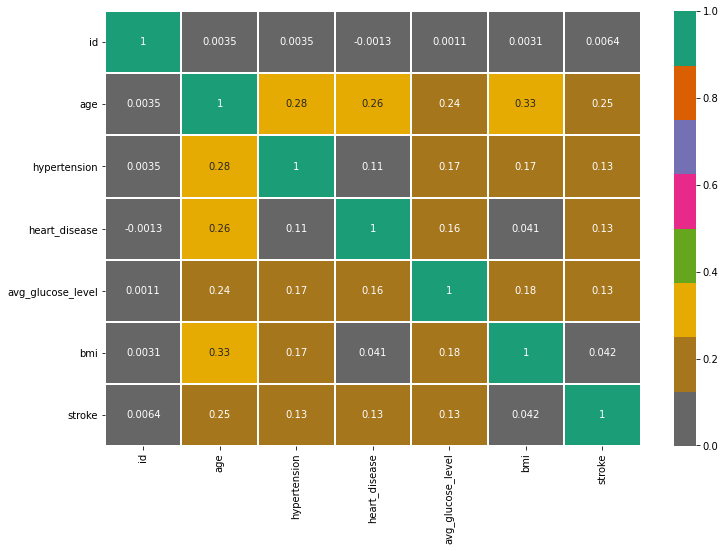

In [15]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()


In [16]:
df3=df.copy(deep=True)
traintest1 = df3.dropna(subset= ["bmi"]) #Keep rows with no missing data 
regr=linear_model.LinearRegression()
la=np.array(traintest1.bmi).reshape(4909,1) # just a copy 
ai=np.array(traintest1.age).reshape(4909,1)
mod1=regr.fit(ai,la) #train data
test=df3.age[df.bmi.isnull()] #age column and bmi column with incomplete data 

predict=regr.predict(test.values.reshape(201,1)) # Predict missing values by regression 
test.replace(to_replace=test.values,value=predict,inplace=True) # Replace the missing values  
df3.bmi.fillna(value=test,inplace=True) # Fit the completed rows

In [17]:
print("Missing Values per Column:")
df3.isnull().sum()

Missing Values per Column:


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Μετατροπή των Categorical Features σε Numerical Value

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
object_type_columns = df3.select_dtypes(include='object')
    
for title in object_type_columns:
     df3[title] = le.fit_transform(df3[title])

# Random Forest Classification


In [19]:
RF_clf = RandomForestClassifier()
new_data = df3.copy(deep=True) #Δημιουργώ deep copy ώστε να μην κάνω αλλαγές στο αρχικό dataset.

X = new_data.drop(['id','stroke'], axis=1)
y = new_data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Χωρίζω το Dataset σε train kai test set με αναλογία 75-25 .

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



c:\users\charalampos\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\charalampos\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\charalampos\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

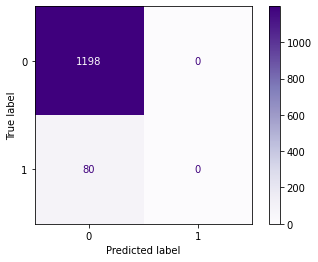

In [20]:
RF_clf.fit(X_train, y_train) 
RF_prediction = RF_clf.predict(X_test)
RF_prob = RF_clf.predict_proba(X_test)[:, 1]
RF_metrics = metrics.f1_score(y_test, RF_prediction).round(2)
RF_report = metrics.classification_report(y_test, RF_prediction)
metrics.plot_confusion_matrix(RF_clf, X_test, y_test, cmap='Purples')
plt.grid(False)
print(RF_report)

# Oversampling

Βλέπουμε ότι το μοντέλο μας δεν ταξινομεί καλά τους 'άσσους' και μας δίνει καλά αποτελέσματα μόνο για τα 'μηδενικά'. Παρατηρώντας την ανάλυση του dataset θα δούμε ότι οι περιπτώσεις που έχουμε 'άσσο', δηλαδή τις περιπτώσεις που έχουμε εγκεφαλικό επεισόδιο είναι πολύ λίγες σε σχέση με τα 'μηδενικά'. Αυτό λύνεται χρησιμοποιώντας την μέθοδο του oversampling ώστε να τα φέρουμε σε μια ισορροπία.

In [21]:
sm = SMOTE(random_state=2) #Balance data by oversampling
x_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
print("Πρίν το oversampling, πλήθος '1': {}".format(sum(y_train==1)))
print("Πρίν το OverSampling, πλήθος '0': {} \n".format(sum(y_train==0)))
print("Μετά το OverSampling, πλήθος '1': {}".format(sum(y_train_res==1)))
print("Μετά το OverSampling, πλήθος '0': {}".format(sum(y_train_res==0)))

Πρίν το oversampling, πλήθος '1': 169
Πρίν το OverSampling, πλήθος '0': 3663 

Μετά το OverSampling, πλήθος '1': 3663
Μετά το OverSampling, πλήθος '0': 3663


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1198
           1       0.22      0.21      0.22        80

    accuracy                           0.90      1278
   macro avg       0.58      0.58      0.58      1278
weighted avg       0.90      0.90      0.90      1278



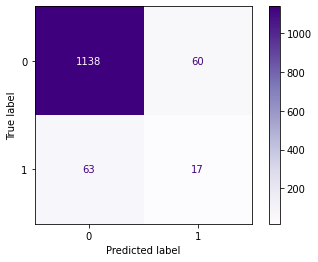

In [22]:
RF_clf.fit(x_train_res, y_train_res) 
RF_prediction = RF_clf.predict(X_test)
RF_prob = RF_clf.predict_proba(X_test)[:, 1]
RF_metrics = metrics.f1_score(y_test, RF_prediction).round(2)
RF_report = metrics.classification_report(y_test, RF_prediction)
metrics.plot_confusion_matrix(RF_clf, X_test, y_test, cmap='Purples')
plt.grid(False)
print(RF_report)